In [2]:
from DynaAgent import DynaAgent
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
env = gym.make('MountainCar-v0')

In [3]:
testDyna = DynaAgent(env, discr_step=[0.025, 0.01])

-----------variables- new--------
number of positions = 72
number of velocity = 14
number of states = 1008
self.discretization_position = [-1.2   -1.175 -1.15  -1.125 -1.1   -1.075 -1.05  -1.025 -1.    -0.975
 -0.95  -0.925 -0.9   -0.875 -0.85  -0.825 -0.8   -0.775 -0.75  -0.725
 -0.7   -0.675 -0.65  -0.625 -0.6   -0.575 -0.55  -0.525 -0.5   -0.475
 -0.45  -0.425 -0.4   -0.375 -0.35  -0.325 -0.3   -0.275 -0.25  -0.225
 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025  0.     0.025
  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225  0.25   0.275
  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475  0.5    0.525
  0.55   0.575  0.6  ]
self.discretization_speed = [-0.07 -0.06 -0.05 -0.04 -0.03 -0.02 -0.01  0.    0.01  0.02  0.03  0.04
  0.05  0.06  0.07]
-----------------------------------------
------------------------------------------
We will log this experiment in directory ./runs/new@discr_step=[0.025, 0.01]@discount_factor=0.99@k_updates=10@20240601-094014
---------

In [4]:
total_reward = testDyna.train(num_episodes=3000)

  0%|          | 0/3000 [00:00<?, ?it/s]

100%|██████████| 3000/3000 [04:23<00:00, 11.40it/s]

[Save Model] : Model was saved succesfully in discr_step=[0.025, 0.01]@discount_factor=0.99@20240601-094443 !


In [6]:
testDyna.freq_actions

[167283, 77543, 223150]

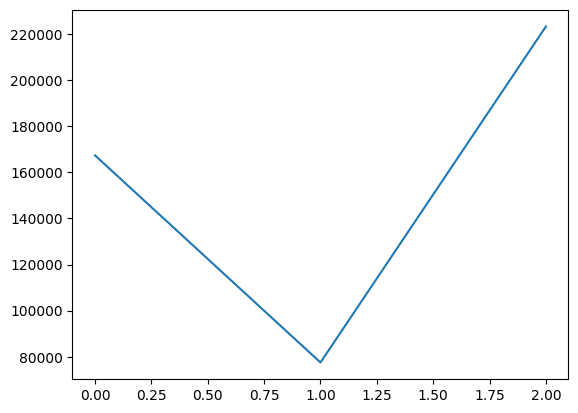

In [7]:
plt.plot(testDyna.freq_actions)

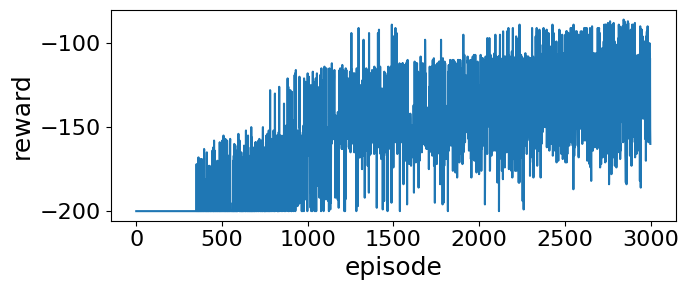

In [8]:
plt.figure(figsize=(7, 3))
plt.plot(total_reward)
#plt.title('Reward at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.show()

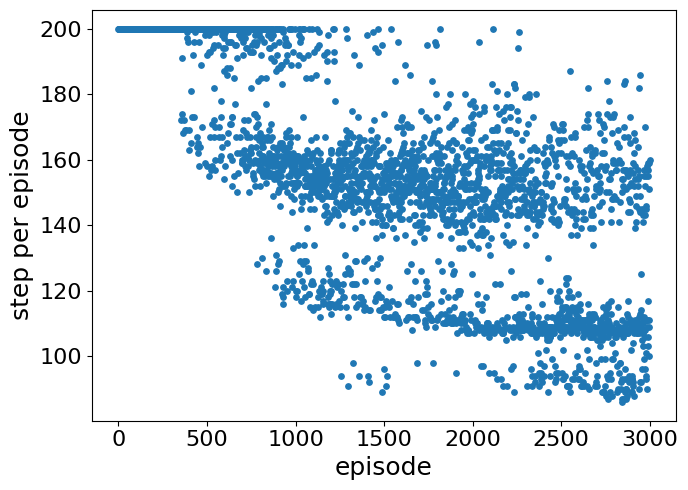

In [9]:
plt.figure(figsize=(7, 5))
plt.scatter(np.arange(3000),np.abs(total_reward), s=15)
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('episode', fontsize=18)
plt.ylabel('step per episode', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()
plt.show()

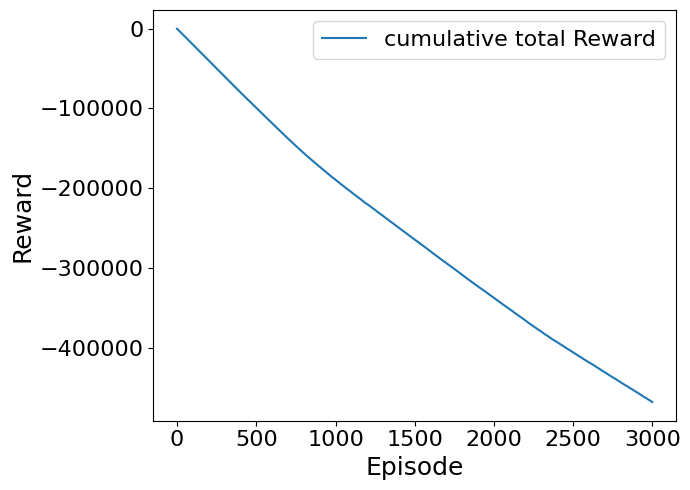

In [10]:
plt.figure(figsize=(7, 5))
plt.plot(np.cumsum(total_reward), label='cumulative total Reward')
#plt.title('Loss at each episode', fontsize=18)
plt.xlabel('Episode', fontsize=18)
plt.ylabel('Reward', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

[-1.20000000e+00 -1.17500000e+00 -1.15000000e+00 -1.12500000e+00
 -1.10000000e+00 -1.07500000e+00 -1.05000000e+00 -1.02500000e+00
 -1.00000000e+00 -9.75000000e-01 -9.50000000e-01 -9.25000000e-01
 -9.00000000e-01 -8.75000000e-01 -8.50000000e-01 -8.25000000e-01
 -8.00000000e-01 -7.75000000e-01 -7.50000000e-01 -7.25000000e-01
 -7.00000000e-01 -6.75000000e-01 -6.50000000e-01 -6.25000000e-01
 -6.00000000e-01 -5.75000000e-01 -5.50000000e-01 -5.25000000e-01
 -5.00000000e-01 -4.75000000e-01 -4.50000000e-01 -4.25000000e-01
 -4.00000000e-01 -3.75000000e-01 -3.50000000e-01 -3.25000000e-01
 -3.00000000e-01 -2.75000000e-01 -2.50000000e-01 -2.25000000e-01
 -2.00000000e-01 -1.75000000e-01 -1.50000000e-01 -1.25000000e-01
 -1.00000000e-01 -7.50000000e-02 -5.00000000e-02 -2.50000000e-02
 -4.21884749e-15  2.50000000e-02  5.00000000e-02  7.50000000e-02
  1.00000000e-01  1.25000000e-01  1.50000000e-01  1.75000000e-01
  2.00000000e-01  2.25000000e-01  2.50000000e-01  2.75000000e-01
  3.00000000e-01  3.25000

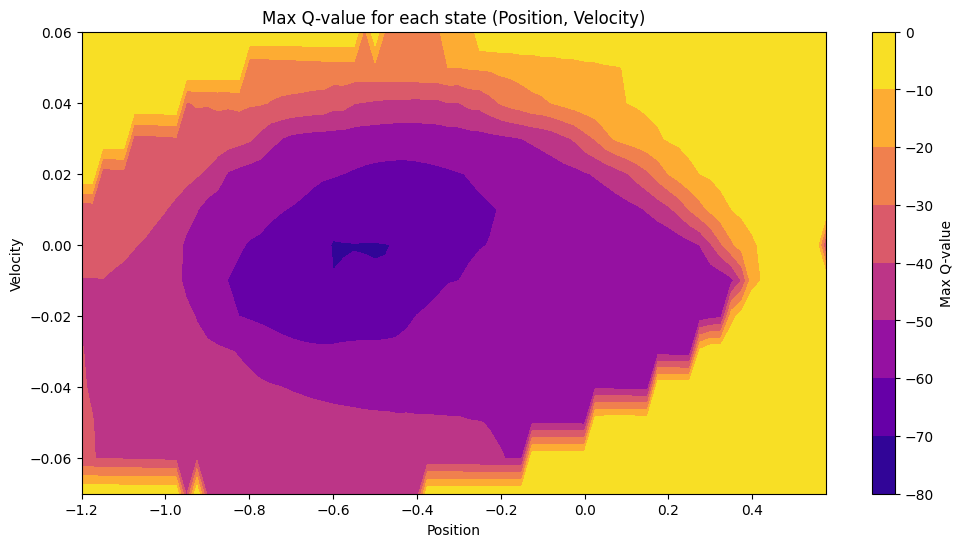

In [11]:
discr_step = (0.025, 0.01)
position_bins = np.arange(-1.2, 0.6, discr_step[0])
velocity_bins = np.arange(-0.07, 0.07, discr_step[1])
print(position_bins)
print(velocity_bins)

num_pos_bins = len(position_bins)
num_vel_bins = len(velocity_bins)

# Assume Q is a numpy array of shape (len(position_bins) + 1, len(velocity_bins) + 1, number_of_actions)
# Replace this with your actual Q-values array
# Q = np.load('path_to_your_Q_values.npy')  # Load your actual Q-values

# Example Q-values for illustration
Q = testDyna.Q

# Extract max Q-values for each state
max_Q_values = np.max(Q, axis=1).reshape(num_pos_bins, num_vel_bins)

# Create a meshgrid for the position and velocity bins
pos_grid, vel_grid = np.meshgrid(position_bins, velocity_bins, indexing='ij')

# Plot the max Q-values
plt.figure(figsize=(12, 6))
plt.contourf(pos_grid, vel_grid, max_Q_values, cmap='plasma')  # Exclude the last row and column
plt.colorbar(label='Max Q-value')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Max Q-value for each state (Position, Velocity)')
plt.show()